# Data Load and Wrangle

## The goal of the exercise is to load a dataset, clean and transform and compute descriptive statistics

In [1]:
# This piece of code enables to display multiple output within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

<div class="alert alert-block alert-warning">
    
## Task Instructions 
### Load one of the built in dataset
### Transform the data as required 
### From a perspective of a journalist interested in writing a story about the data, **_ask and answer_** **3** questions that summarize the sample. 
    
#### Please *_only use summary statistics_* (mean, median, mode, standard deviation, variance, range,..). The statistics can be computed by groups.

#### Reference :https://kolesnikov.ga/Datasets_in_Python/

</div>

In [2]:
git add--all
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.linear_model import LinearRegression
co2 = sm.datasets.co2
print(co2.DESCRLONG)

SyntaxError: invalid syntax (<ipython-input-2-2cdd2ba2ce5f>, line 1)

In [5]:
plt.close("all")

In [6]:
# Journalist: "How many samples were recorded?"
print(co2.NOTE)


::

    Number of observations: 2225
    Number of variables: 2
    Variable name definitions:

        date - sample date in YYMMDD format
        co2 - CO2 Concentration ppmv

    The data returned by load_pandas contains the dates as the index.



In [6]:
# answer: "2225 samples were taken."

In [7]:
dataset_co2=co2.load_pandas()



In [8]:
df_co2=dataset_co2.data
df_co2.head()
    

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [9]:
sm.datasets.co2.load_pandas().data

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [10]:
dataset_co2 = co2.load_pandas()
df_co2 = dataset_co2.data
df_co2.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [11]:
df_co2.mean()



co2    340.142247
dtype: float64

In [12]:
# Journalist: "what was the highest co2 value recorded in this data set?"
df_co2.describe()
#answer: "the highest level found was 373.9"

,co2
count,2225.000000
mean,340.142247
std,17.003885
min,313.000000
25%,324.800000
50%,338.300000
75%,354.800000
max,373.900000


In [13]:
df_co2['recordeddate']=df_co2.index
df_co2.head()


,co2,recordeddate
1958-03-29,316.1,1958-03-29
1958-04-05,317.3,1958-04-05
1958-04-12,317.6,1958-04-12
1958-04-19,317.5,1958-04-19
1958-04-26,316.4,1958-04-26


In [14]:
df_co2.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   co2           2225 non-null   float64       
 1   recordeddate  2284 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 53.5 KB


In [15]:
df_co2['recordedyear']=df_co2['recordeddate'].dt.year
df_co2.head()


,co2,recordeddate,recordedyear
1958-03-29,316.1,1958-03-29,1958
1958-04-05,317.3,1958-04-05,1958
1958-04-12,317.6,1958-04-12,1958
1958-04-19,317.5,1958-04-19,1958
1958-04-26,316.4,1958-04-26,1958


In [16]:
df_co2['recordeddate']


1958-03-29   1958-03-29
1958-04-05   1958-04-05
1958-04-12   1958-04-12
1958-04-19   1958-04-19
1958-04-26   1958-04-26
                ...    
2001-12-01   2001-12-01
2001-12-08   2001-12-08
2001-12-15   2001-12-15
2001-12-22   2001-12-22
2001-12-29   2001-12-29
Freq: W-SAT, Name: recordeddate, Length: 2284, dtype: datetime64[ns]

In [17]:
df_co2['recordedmonth']=df_co2['recordeddate'].dt.month
df_co2.head()

,co2,recordeddate,recordedyear,recordedmonth
1958-03-29,316.1,1958-03-29,1958,3
1958-04-05,317.3,1958-04-05,1958,4
1958-04-12,317.6,1958-04-12,1958,4
1958-04-19,317.5,1958-04-19,1958,4
1958-04-26,316.4,1958-04-26,1958,4


In [18]:
# Journalist: "what were the highest and lowest levels of co2 found in this database?"
bins=[300, 325,350,400]
names=['low','medium','high']
df_co2['co2_cat']=pd.cut(df_co2['co2'], bins, labels=names)
df_co2.head()


,co2,recordeddate,recordedyear,recordedmonth,co2_cat
1958-03-29,316.1,1958-03-29,1958,3,low
1958-04-05,317.3,1958-04-05,1958,4,low
1958-04-12,317.6,1958-04-12,1958,4,low
1958-04-19,317.5,1958-04-19,1958,4,low
1958-04-26,316.4,1958-04-26,1958,4,low


In [19]:
df_co2.tail()

,co2,recordeddate,recordedyear,recordedmonth,co2_cat
2001-12-01,370.3,2001-12-01,2001,12,high
2001-12-08,370.8,2001-12-08,2001,12,high
2001-12-15,371.2,2001-12-15,2001,12,high
2001-12-22,371.3,2001-12-22,2001,12,high
2001-12-29,371.5,2001-12-29,2001,12,high


In [20]:
# answer: "the highest levels of Co2 were from December 2001, and the lowest were in April of 1958"

In [21]:
# Journalist:"where is the divide in between high and low co2 levels?"
df_co2.median()


<ipython-input-21-18bb3774cb52>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_co2.median()


co2               338.3
recordedyear     1980.0
recordedmonth       7.0
dtype: float64

In [22]:
#answer: The median occured in 1980 with a value of 338.3

In [23]:
#journalist: "may I please see the data with now the exact days instead of just year and month. "
df_co2['recordedday']=df_co2['recordeddate'].dt.day
df_co2.head()

,co2,recordeddate,recordedyear,recordedmonth,co2_cat,recordedday
1958-03-29,316.1,1958-03-29,1958,3,low,29
1958-04-05,317.3,1958-04-05,1958,4,low,5
1958-04-12,317.6,1958-04-12,1958,4,low,12
1958-04-19,317.5,1958-04-19,1958,4,low,19
1958-04-26,316.4,1958-04-26,1958,4,low,26


In [24]:
df_co2.tail()


,co2,recordeddate,recordedyear,recordedmonth,co2_cat,recordedday
2001-12-01,370.3,2001-12-01,2001,12,high,1
2001-12-08,370.8,2001-12-08,2001,12,high,8
2001-12-15,371.2,2001-12-15,2001,12,high,15
2001-12-22,371.3,2001-12-22,2001,12,high,22
2001-12-29,371.5,2001-12-29,2001,12,high,29


In [25]:
xdata = np.linspace(0,400,400)
ydata = np.sqrt(xdata)

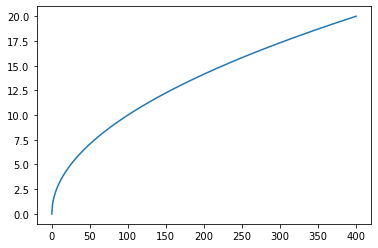

In [26]:
plt.plot(xdata, ydata)

Text(0.5, 1.0, 'co2 rise')

Text(0.5, 0, 'co2 value')

Text(0, 0.5, 'date')

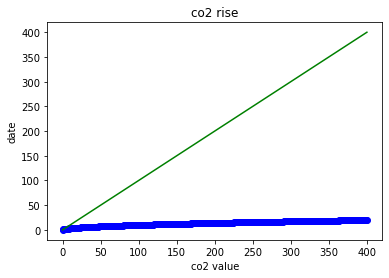

In [27]:
plt.plot(xdata, ydata, "bo", xdata, ydata ** 2, "g-")
plt.title("co2 rise")
plt.xlabel("co2 value")
plt.ylabel("date")

In [28]:
df_co2.columns


Index(['co2', 'recordeddate', 'recordedyear', 'recordedmonth', 'co2_cat',
       'recordedday'],
      dtype='object')

In [29]:
df_co2.head()


,co2,recordeddate,recordedyear,recordedmonth,co2_cat,recordedday
1958-03-29,316.1,1958-03-29,1958,3,low,29
1958-04-05,317.3,1958-04-05,1958,4,low,5
1958-04-12,317.6,1958-04-12,1958,4,low,12
1958-04-19,317.5,1958-04-19,1958,4,low,19
1958-04-26,316.4,1958-04-26,1958,4,low,26


In [30]:
df_co2.tail()

,co2,recordeddate,recordedyear,recordedmonth,co2_cat,recordedday
2001-12-01,370.3,2001-12-01,2001,12,high,1
2001-12-08,370.8,2001-12-08,2001,12,high,8
2001-12-15,371.2,2001-12-15,2001,12,high,15
2001-12-22,371.3,2001-12-22,2001,12,high,22
2001-12-29,371.5,2001-12-29,2001,12,high,29


Text(0.5, 1.0, 'Co2 trends of 1958 vs 2001')

Text(0.5, 0, 'days')

Text(0, 0.5, 'Co2 level')

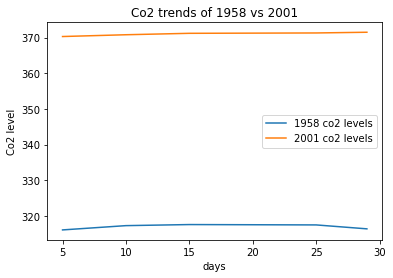

In [31]:
#showing journalist the trend of how co2 was greater in the 2000's
x=[5,10,15,25,29]
y=[316.1,317.3,317.6,317.5,316.4]
z=[370.3,370.8,371.2,371.3,371.5]
plt.plot(x,y)
plt.plot(x,z)
plt.title("Co2 trends of 1958 vs 2001")
plt.xlabel("days")
plt.ylabel("Co2 level")
plt.legend(["1958 co2 levels","2001 co2 levels"])
plt.show()


Text(0.5, 1.0, 'Basic Plot')

{'whiskers': [<matplotlib.lines.Line2D at 0x1f28d205670>,
 'caps': [<matplotlib.lines.Line2D at 0x1f28d205c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f28d205370>],
 'medians': [<matplotlib.lines.Line2D at 0x1f28d20f370>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f28d20f6d0>],
 'means': []}

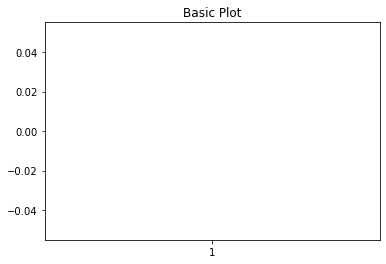

In [32]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df_co2['co2'])


<AxesSubplot:title={'center':'co2'}, xlabel='[recordeddate]'>

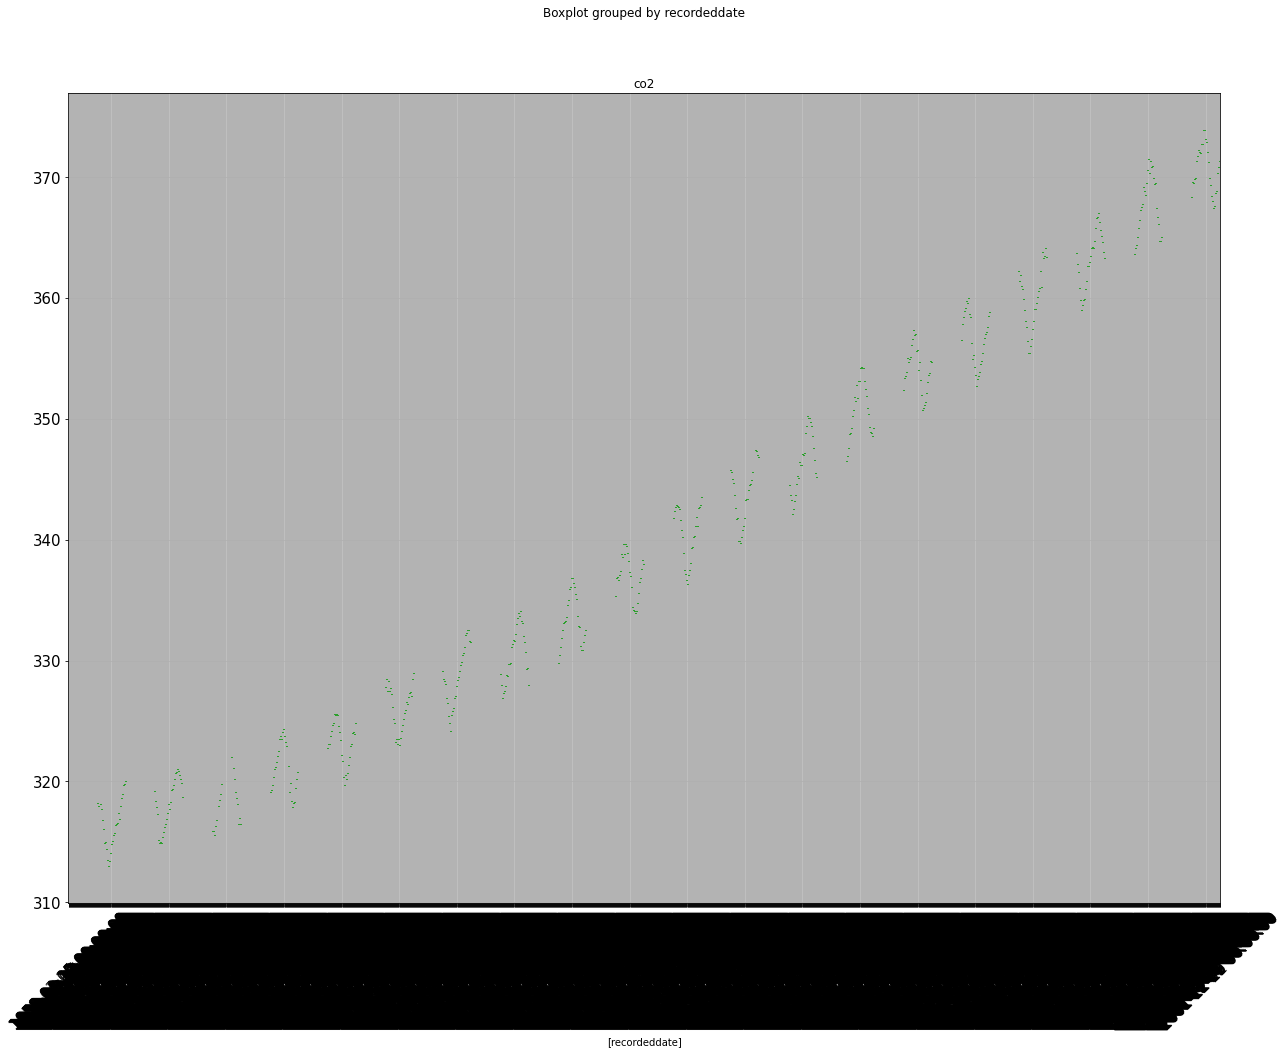

In [33]:
df_co2[['co2','recordeddate']].boxplot(column=['co2'], by=['recordeddate'], 
                                           rot=45, fontsize=15, figsize=(20,15))

In [ ]:
plt.scatter(df_co2['co2'])

In [ ]:
subsetd = df_co2[['co2']]
pd.plotting.scatter_matrix(subsetd, alpha=0.9, marker="o", figsize=(15,15),diagonal = 'kde', grid=True)

In [ ]:
# gaussian test

In [36]:
from scipy.stats import shapiro
series_2test= df_co2[['co2']]
stat, p = shapiro(series_2test)
print('stat=%.3f, p=%.3f'%(stat,p))
if p > 0.05:
    print('probably gaussian')
else:
    print('probably not gaussian')
    
    

stat=nan, p=1.000
probably gaussian


In [ ]:
#THIS IS FOR THE TIME SERIES :D
nifty = df_co2

In [ ]:
nifty.head()

In [28]:
nifty.tail()

,co2,recordeddate,recordedyear
2001-12-01,370.3,2001-12-01,2001
2001-12-08,370.8,2001-12-08,2001
2001-12-15,371.2,2001-12-15,2001
2001-12-22,371.3,2001-12-22,2001
2001-12-29,371.5,2001-12-29,2001


In [29]:
type(nifty)

pandas.core.frame.DataFrame

In [30]:
nifty['2001-12']

,co2,recordeddate,recordedyear
2001-12-01,370.3,2001-12-01,2001
2001-12-08,370.8,2001-12-08,2001
2001-12-15,371.2,2001-12-15,2001
2001-12-22,371.3,2001-12-22,2001
2001-12-29,371.5,2001-12-29,2001


In [31]:
nifty.size

6852

In [32]:
nifty.describe()

,co2,recordedyear
count,2225.000000,2284.000000
mean,340.142247,1979.614711
std,17.003885,12.639115
min,313.000000,1958.000000
25%,324.800000,1969.000000
50%,338.300000,1980.000000
75%,354.800000,1991.000000
max,373.900000,2001.000000


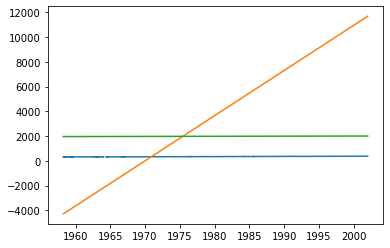

In [33]:
from matplotlib import pyplot
pyplot.plot(nifty)
pyplot.show()


In [39]:
# Now using a time series analysis. This is for the resubmission for data analysis 1 where you stated you wanted time series instead.

hypothesis
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   co2            2225 non-null   float64       
 1   recordeddate   2284 non-null   datetime64[ns]
 2   recordedyear   2284 non-null   int64         
 3   recordedmonth  2284 non-null   int64         
 4   co2_cat        2225 non-null   category      
 5   recordedday    2284 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(3)
memory usage: 109.4 KB


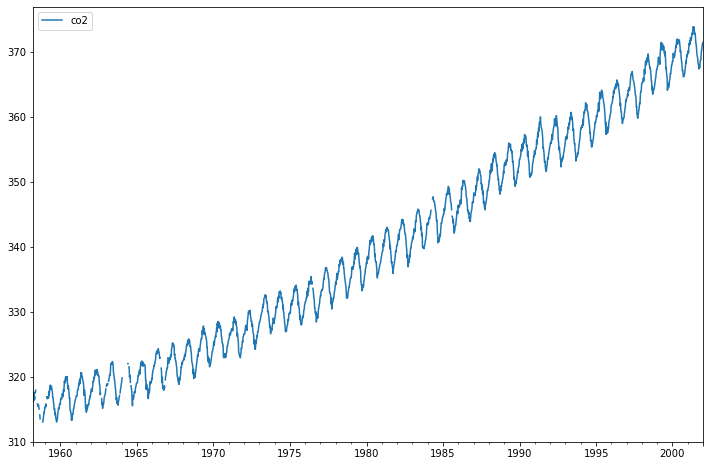

In [38]:
print ("hypothesis")
df_co2_ts=df_co2
df_co2_ts.info()
df_co2_ts.head()
df_co2_ts.tail()

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)
df_co2_ts.co2.plot(ax=ax);
legend= ax.legend(loc='upper left');
legend.prop.set_size(20);


In [40]:
# Using time series, I was able to see and show any journalist an alarming reality. CO2 has increased almost linearly with seasonality of course due to the change in seasons. 